# **Linear Regression Project**

**NAME- VIKASH KUMAR DIWAKAR**

# **Problem Statement**

We need to predict the chance of admission based on he student various scores .

Feature or independent Variables:

`GRE Score`

`TOEFL Score`

`SOP`

`LOR`

`CGPA`

`Research`

Label/Target:

`Chance of Admission`

In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

from prettytable import PrettyTable

In [2]:
# importing dataset
df=pd.read_csv('https://raw.githubusercontent.com/s4sauravv/Datasets/main/Admission_Prediction.csv')

In [3]:
# viewing first 5 rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.500000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,485.0,316.558763,11.274704,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,490.0,107.187755,6.112899,92.00,103.0000,107.00,112.00,120.00
University Rating,485.0,3.121649,1.146160,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.374000,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.484000,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.576440,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.560000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.721740,0.141140,0.34,0.6300,0.72,0.82,0.97


In [5]:
# checking null values
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
# seeing info and dattypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [7]:
# checking for duplicate values
df.duplicated().sum()

0

**filling GRE Score NaN values:**

In [8]:
mean_gre_score=round(df[~df['GRE Score'].isnull()]['GRE Score'].mean(),4)
median_gre_score=df[~df['GRE Score'].isnull()]['GRE Score'].median()
[mean_gre_score,median_gre_score]

[316.5588, 317.0]

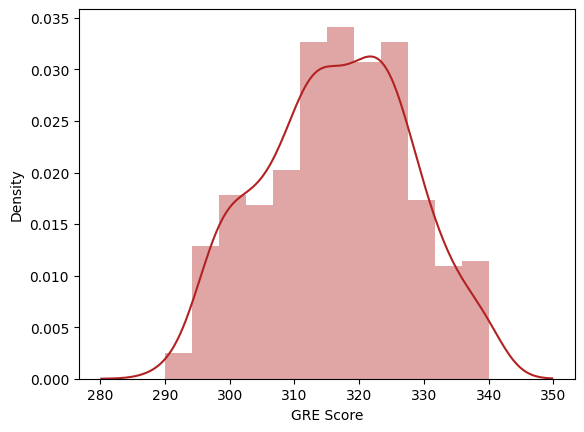

In [9]:
sns.distplot(df['GRE Score'],color='firebrick');

In [10]:
df['GRE Score'].fillna(value=median_gre_score, inplace=True)

**Filling TOEFL Score NaN Values:**

In [11]:
mean_TOEFL_Score=df[~df['TOEFL Score'].isnull()]['TOEFL Score'].median()
mean_TOEFL_Score

107.0

In [12]:
df['TOEFL Score'].fillna(value=df['TOEFL Score'].median(),inplace=True)

**Filling University Rating NaN Values:**

In [13]:
df['University Rating'].fillna(value=df['University Rating'].mode()[0],inplace=True)

In [14]:
# lets check null values now
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [15]:
df.sample(1)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
363,364,306.0,103.0,2.0,2.5,3.0,8.36,0,0.69


In [16]:
# dropping serial number col
df.drop(columns='Serial No.',inplace=True)

In [17]:
df.sample(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
483,304.0,103.0,5.0,5.0,3.0,7.92,0,0.71


# **Seperating Continious and categorical column:**

##**Continious independent variable:**

In [18]:
# assigning columns with continious values
continious_var=['GRE Score','TOEFL Score','CGPA']

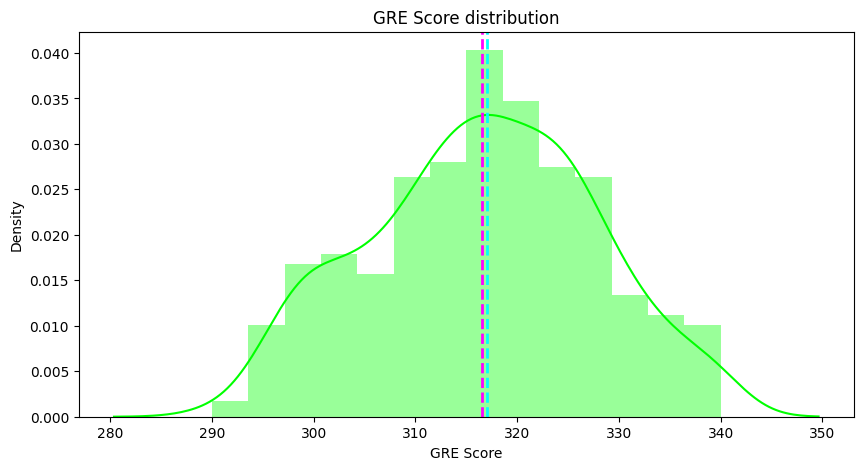

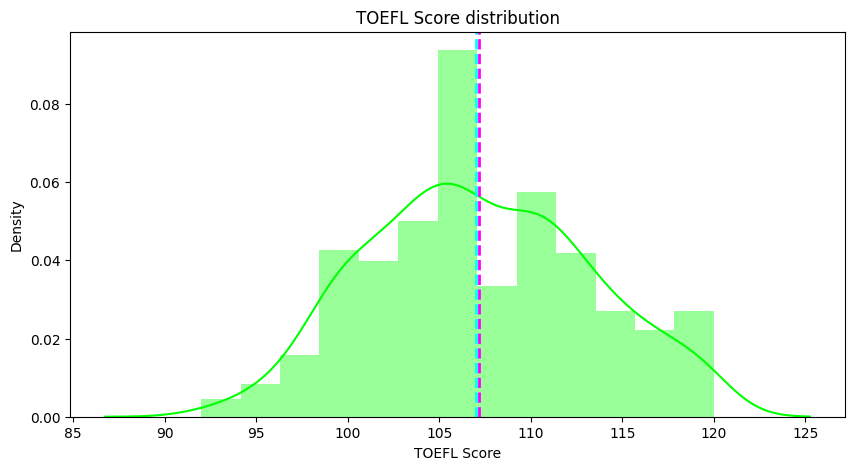

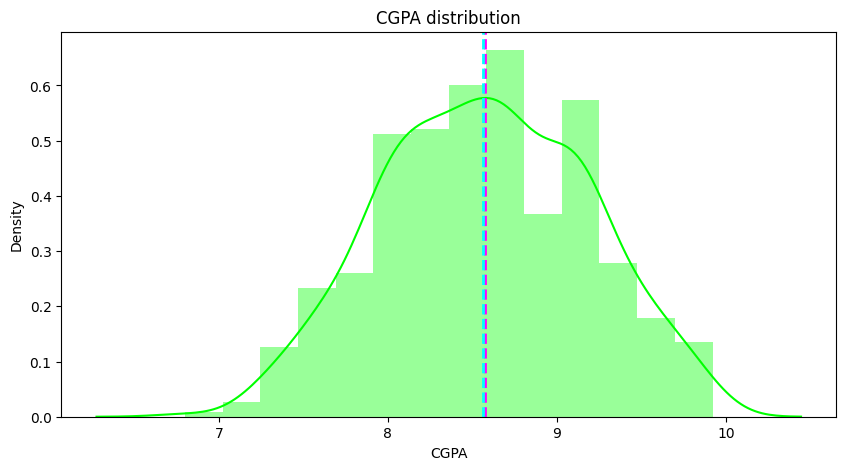

In [19]:
#univariate analysis by vizualization
for col in continious_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col],color='lime')
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

##**Analysing independent continious variable with dependent(target) data:**

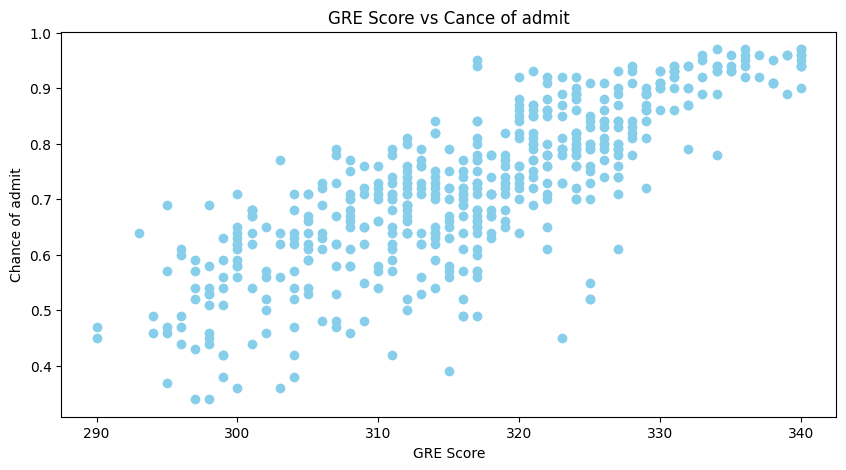

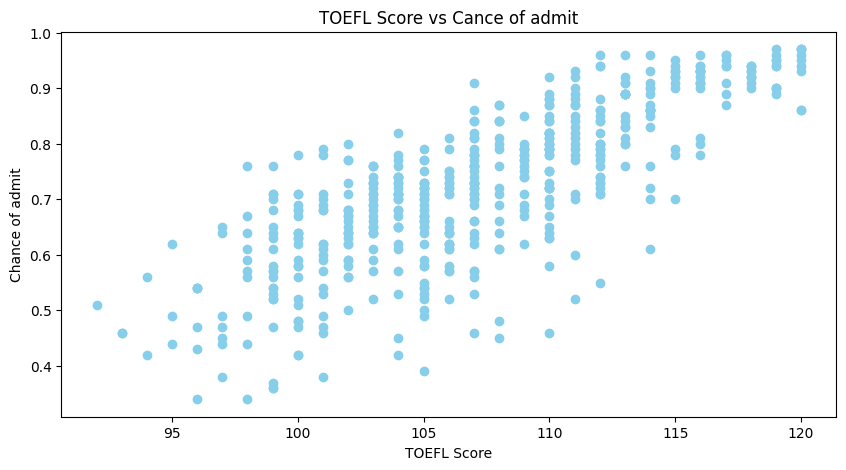

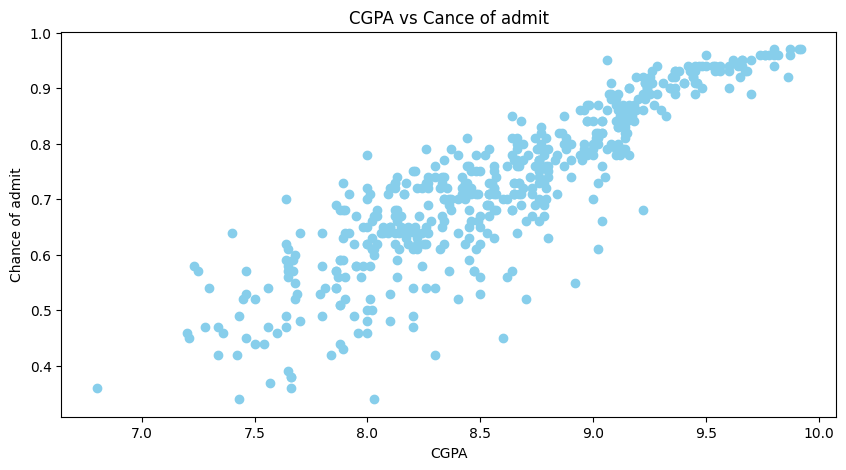

In [20]:
# checking relation with dependent variables
for i in continious_var:
  plt.figure(figsize=(10,5))
  plt.scatter(x=i,y='Chance of Admit',data=df,color='skyblue')
  plt.xlabel(i)
  plt.ylabel('Chance of admit')
  plt.title(i+' vs '+ 'Cance of admit')
  # plt.show()



*   independent continious variables are linearly related with the target column.
*   we can easily go for model implementation.



##**Categorical independent variable:**

In [21]:
df.sample()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
117,290.0,104.0,4.0,2.0,2.5,7.46,0,0.45


In [22]:
# assigning categorical values
categorical_var=['University Rating','SOP','LOR','Research']

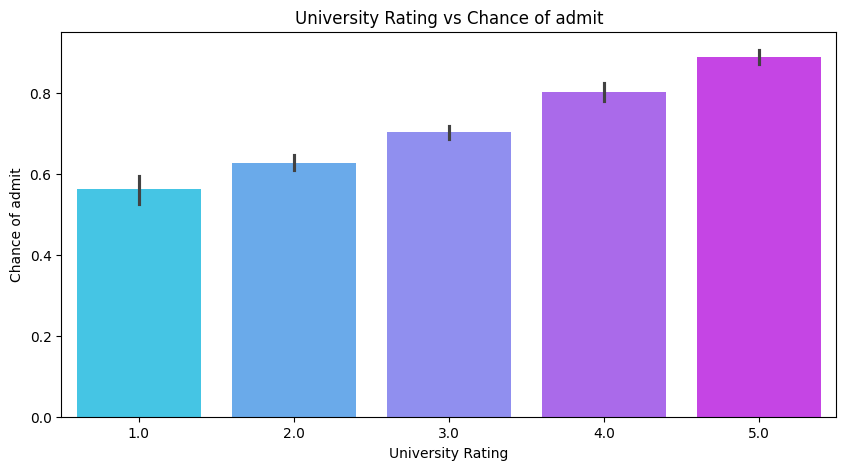

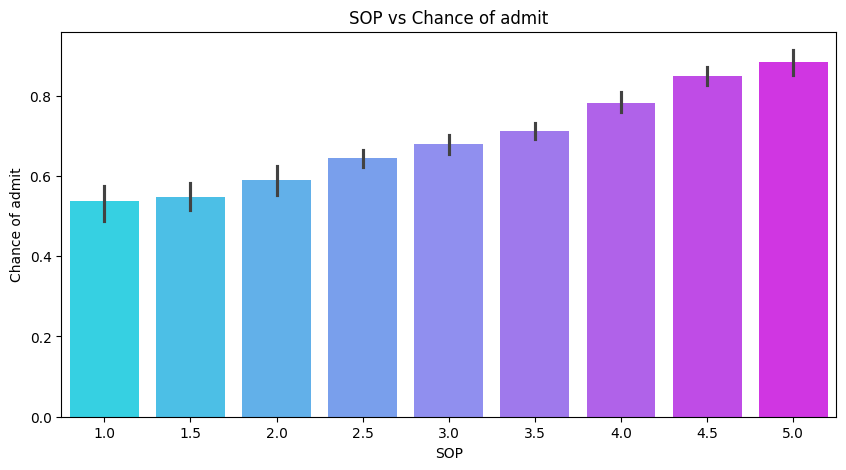

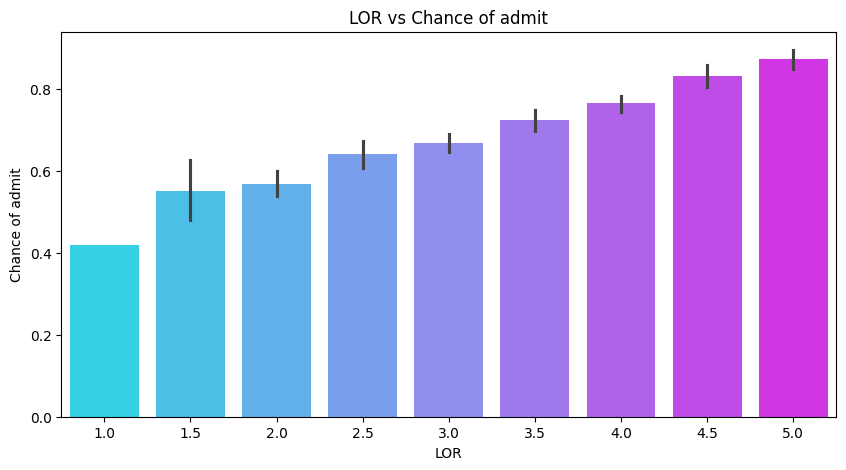

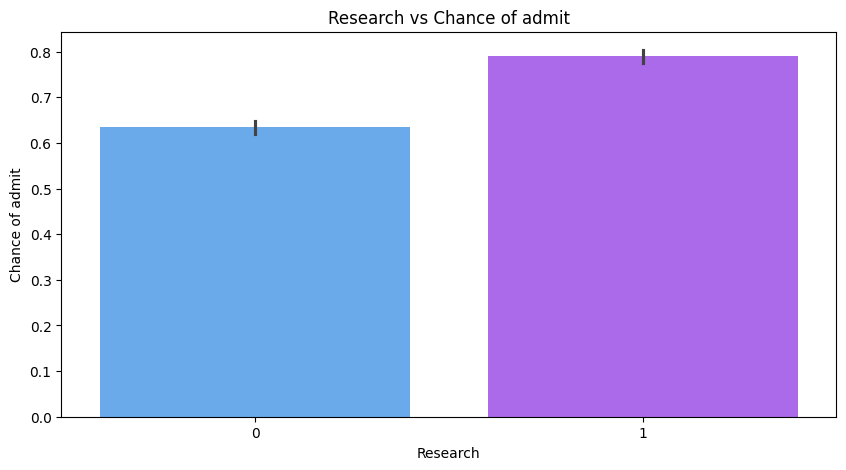

In [23]:
# vizualising categorivcal columns with target column
for i in categorical_var:
  plt.figure(figsize=(10,5))
  sns.barplot(x=i,y='Chance of Admit',data=df,palette='cool')
  plt.xlabel(i)
  plt.ylabel('Chance of admit')
  plt.title(i+' vs '+ 'Chance of admit')
  plt.show()

# **Model implementation:**

In [24]:
df.sample()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
335,325.0,111.0,4.0,4.0,4.5,9.11,1,0.83


In [25]:
# assigning x and y for model implentation
X=df.drop(columns='Chance of Admit')
y=df['Chance of Admit']

In [26]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,317.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [27]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [29]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42,shuffle=True)
print(X_train.shape)
print(X_test.shape)

(400, 7)
(100, 7)


In [30]:
# assigning model and fitting on training data
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [31]:
# predcting the seen and unseen data
y_train_pred=reg.predict(X_train)
y_pred=reg.predict(X_test)

In [32]:
# getting differnt errors and scores
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE 0.0036583115729418355
RMSE 0.060483977820095756
R2 score 0.8211094585358516
Adjusted R2 score 0.8074982216853186


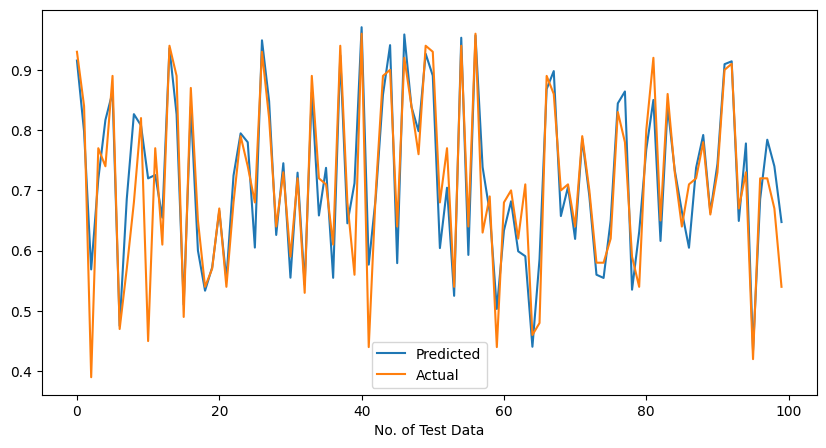

In [33]:
# plotting actual vs predicted data
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **Regualarization:**

##**Lasso:**

In [34]:
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,8,12,15,18,21,25]}
Reg_Lasso = GridSearchCV(Lasso(), parameters, cv=10)
Reg_Lasso.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 2, 3, 4, 5, 8, 12, 15, 18, 21,
                                   25]})

In [35]:
y_train_pred=Reg_Lasso.predict(X_train)
y_pred=Reg_Lasso.predict(X_test)

In [36]:
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE 0.003651996271640354
RMSE 0.06043174887127092
R2 score 0.8214182752254106
Adjusted R2 score 0.8078305352969092


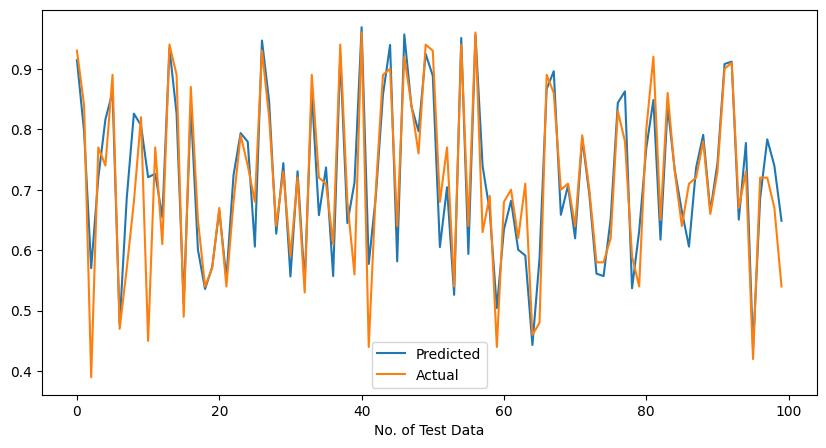

In [37]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

##**Ridge:**

In [38]:
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,8,12,15,18,21,25]}
Reg_Ridge = GridSearchCV(Ridge(), parameters, cv=10)
Reg_Ridge.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 2, 3, 4, 5, 8, 12, 15, 18, 21,
                                   25]})

In [39]:
y_train_pred=Reg_Ridge.predict(X_train)
y_pred=Reg_Ridge.predict(X_test)

In [40]:
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

MSE 0.0036652741258464704
RMSE 0.06054150746261998
R2 score 0.8207689914011507
Adjusted R2 score 0.8071318494425426


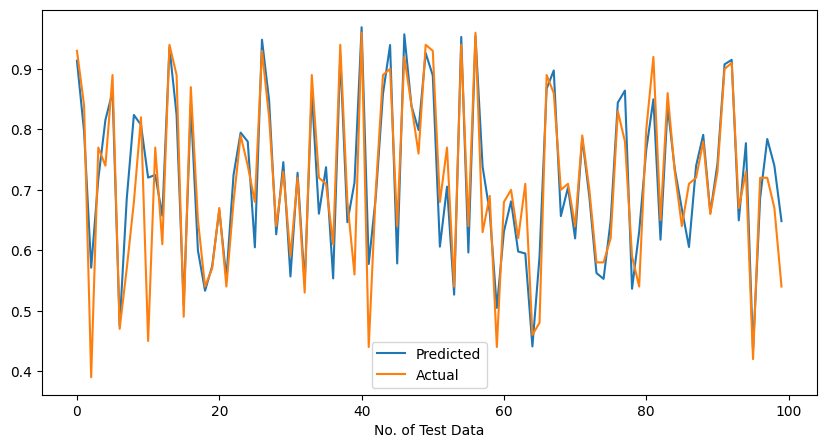

In [41]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()